# Boston House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Load the Boston House Pricing Dataset

In [6]:
df = pd.read_csv('HousingData.csv')
df.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### Dataset Description

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Creator: Harrison, D. and Rubinfeld, D.L.

# Exploratory Data Analysis

## Preparing The Dataset

In [7]:
#Dimension of the dataframe
df.shape

(506, 14)

In [8]:
# All the columns
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
#Datatypes of each column
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [11]:

## Summarizing The Stats of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
#unique values present in target column
df["MEDV"].unique()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 13.6, 19.6, 15.2, 14.5,
       15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 20. ,
       24.7, 30.8, 34.9, 26.6, 25.3, 21.2, 19.3, 14.4, 19.4, 19.7, 20.5,
       25. , 23.4, 35.4, 31.6, 23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. ,
       17.4, 20.9, 24.2, 22.8, 24.1, 21.4, 20.8, 20.3, 28. , 23.9, 24.8,
       22.5, 23.6, 22.6, 20.6, 28.4, 38.7, 43.8, 33.2, 27.5, 26.5, 18.6,
       20.1, 19.5, 19.8, 18.8, 18.5, 18.3, 19.2, 17.3, 15.7, 16.2, 18. ,
       14.3, 23. , 18.1, 17.1, 13.3, 17.8, 14. , 13.4, 11.8, 13.8, 14.6,
       15.4, 21.5, 15.3, 17. , 41.3, 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 24.6, 29.9, 37.2, 39.8, 37.9, 32.5, 26.4, 29.6,
       32. , 29.8, 37. , 30.5, 36.4, 31.1, 29.1, 33.3, 30.3, 34.6, 32.9,
       42.3, 48.5, 24.4, 22.4, 28.1, 23.7, 26.7, 30.1, 44.8, 37.6, 46.7,
       31.5, 31.7, 41.7, 48.3, 29. , 25.1, 17.6, 24

### check for missing values

In [13]:
df.isnull()
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

<Axes: >

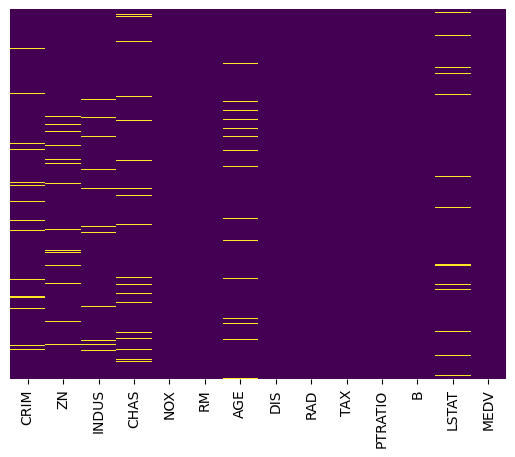

In [15]:
# Heatmap

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
#unique values present
df.apply(pd.Series.nunique)

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

"CHAS" column has only TWO unique category. This column won't give much information so we can drop it.

### Clean the Data

In [17]:
#drop columns
df.drop(columns=['CHAS'],inplace=True)

In [18]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [19]:
## Drop missing values
df.dropna(inplace=True)

In [21]:
df.shape

(411, 13)

In [25]:
df.groupby('MEDV').mean()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,,,,,,,,,,,,
5.0,53.136300,0.000000,18.100000,0.693000,5.568000,100.000000,1.457500,24.0,666.00,20.20,390.935000,26.785000
5.6,25.046100,0.000000,18.100000,0.693000,5.987000,100.000000,1.588800,24.0,666.00,20.20,396.900000,26.770000
6.3,9.916550,0.000000,18.100000,0.693000,5.852000,77.800000,1.500400,24.0,666.00,20.20,338.160000,29.970000
7.0,22.964735,0.000000,22.920000,0.651000,4.966500,99.150000,1.706800,14.0,688.50,20.15,216.160000,30.475000
7.2,16.377533,0.000000,18.100000,0.690667,6.018000,99.366667,1.611633,24.0,666.00,20.20,273.683333,26.726667
...,...,...,...,...,...,...,...,...,...,...,...,...
44.8,0.315330,0.000000,6.200000,0.504000,8.266000,78.300000,2.894400,8.0,307.00,17.40,385.050000,4.140000
45.4,0.035780,20.000000,3.330000,0.442900,7.820000,64.500000,4.694700,5.0,216.00,14.90,387.310000,3.760000
46.0,0.061290,20.000000,3.330000,0.442900,7.645000,49.700000,5.211900,5.0,216.00,14.90,377.070000,3.010000


## Data Visualisation

### Correlation metrics

In [22]:
df.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191127,0.398562,0.417369,-0.229766,0.348642,-0.372728,0.613391,0.567151,0.274616,-0.381582,0.464788,-0.398746
ZN,-0.191127,1.000000,-0.524292,-0.514214,0.336709,-0.563472,0.647616,-0.303141,-0.307963,-0.419925,0.169548,-0.412801,0.403151
INDUS,0.398562,-0.524292,1.000000,0.763221,-0.400794,0.644317,-0.700488,0.600022,0.737572,0.396146,-0.345328,0.594616,-0.511009
NOX,0.417369,-0.514214,0.763221,1.000000,-0.321623,0.734036,-0.770044,0.626215,0.678792,0.211590,-0.383407,0.591242,-0.462516
RM,-0.229766,0.336709,-0.400794,-0.321623,1.000000,-0.252272,0.223775,-0.233096,-0.316523,-0.368554,0.130516,-0.623638,0.706862
AGE,0.348642,-0.563472,0.644317,0.734036,-0.252272,1.000000,-0.752230,0.455856,0.515076,0.271668,-0.285057,0.602318,-0.411035
DIS,-0.372728,0.647616,-0.700488,-0.770044,0.223775,-0.752230,1.000000,-0.488199,-0.539080,-0.243902,0.288057,-0.504777,0.282049
RAD,0.613391,-0.303141,0.600022,0.626215,-0.233096,0.455856,-0.488199,1.000000,0.904055,0.452479,-0.442734,0.510322,-0.416214
TAX,0.567151,-0.307963,0.737572,0.678792,-0.316523,0.515076,-0.539080,0.904055,1.000000,0.454956,-0.434637,0.569757,-0.507151
PTRATIO,0.274616,-0.419925,0.396146,0.211590,-0.368554,0.271668,-0.243902,0.452479,0.454956,1.000000,-0.184743,0.390643,-0.532117


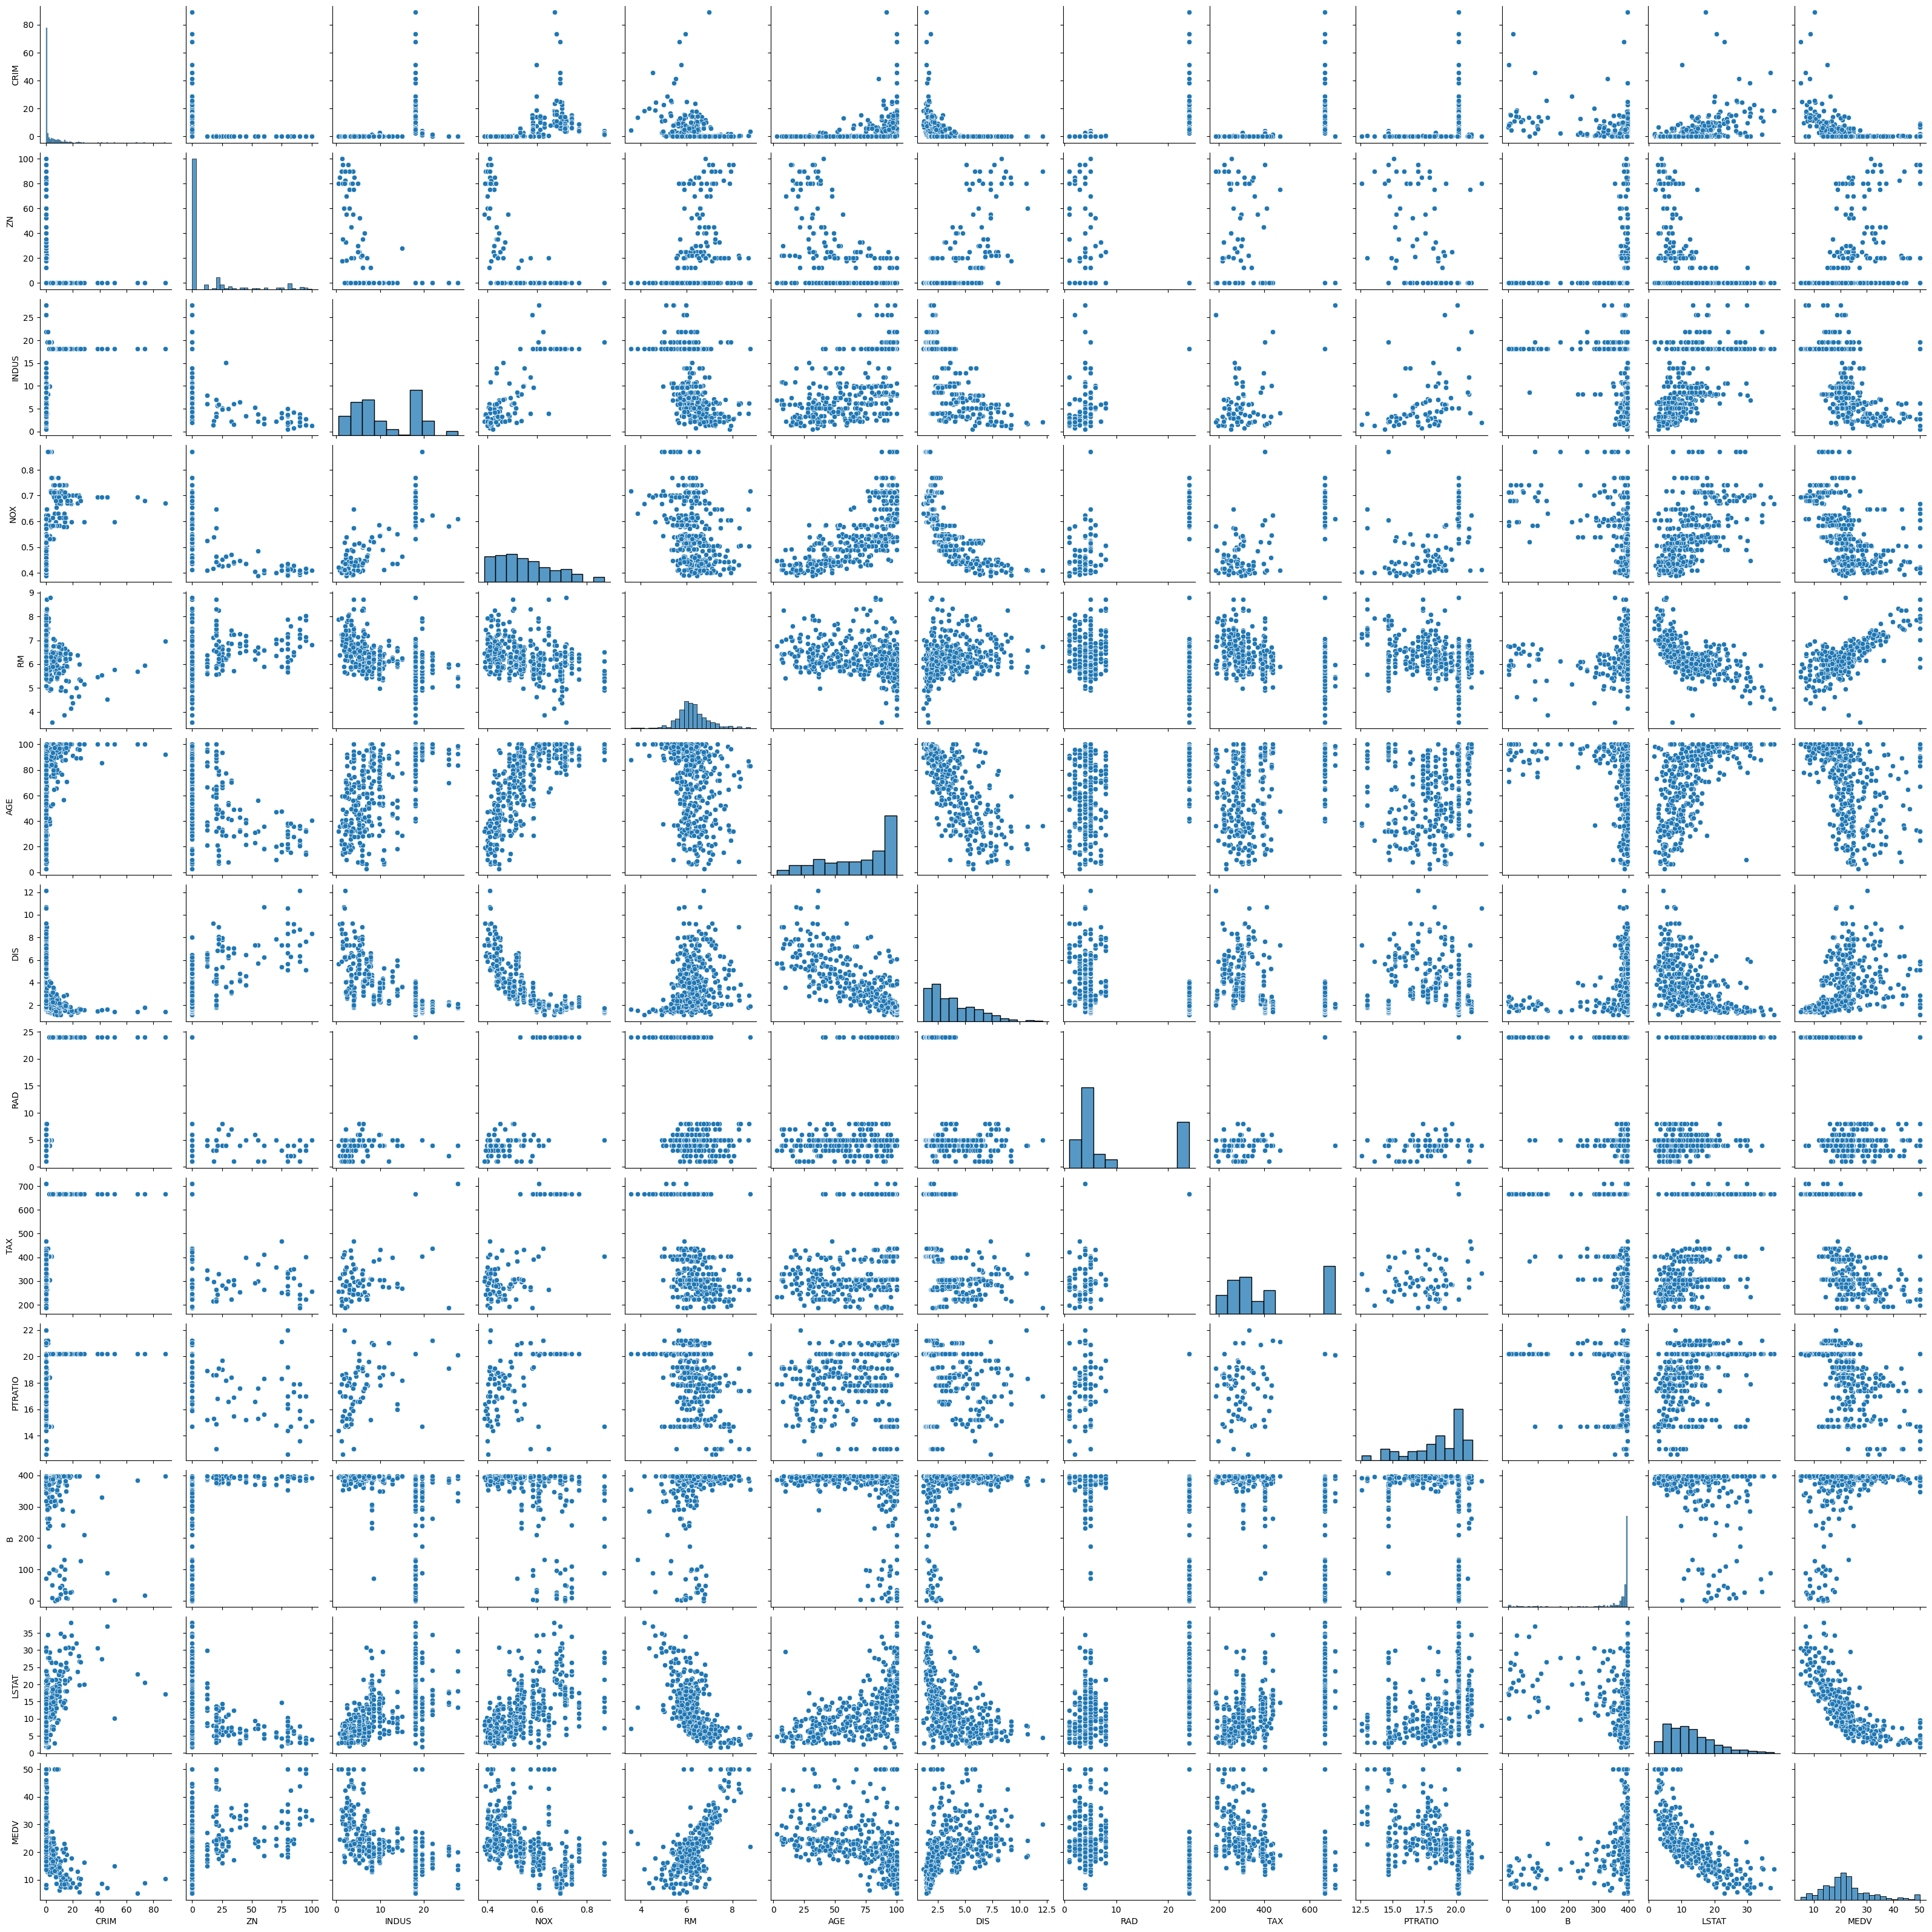

In [23]:
sns.pairplot(df)

## Histogram plot for each Numerical feature

Text(0.5, 0.98, 'Histogram plot')

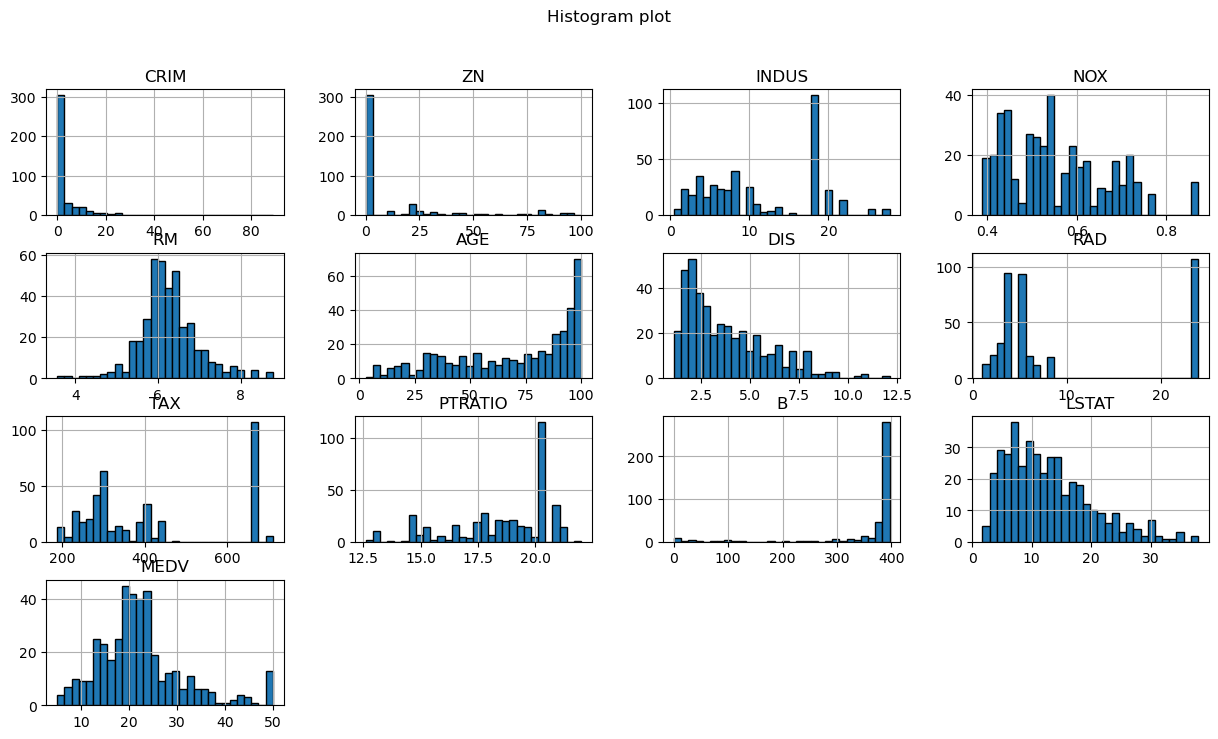

In [24]:
df.hist(figsize=(15,8),bins=30,edgecolor="black")
plt.suptitle("Histogram plot")

C:\Users\shromana\AppData\Local\Temp\ipykernel_8300\1566055965.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MEDV)


<Axes: xlabel='MEDV', ylabel='Density'>

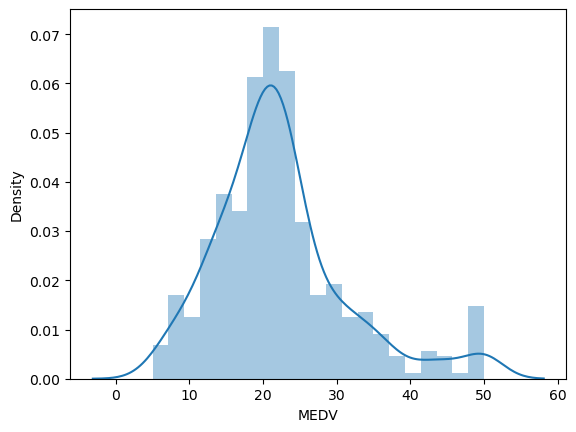

In [26]:
# Normality assumption - Checks
sns.distplot(df.MEDV)

Normal Distribution

### Analyzing The Correlated Features

Text(0.5, 1.0, 'House Price prediction Multivariate Plot')

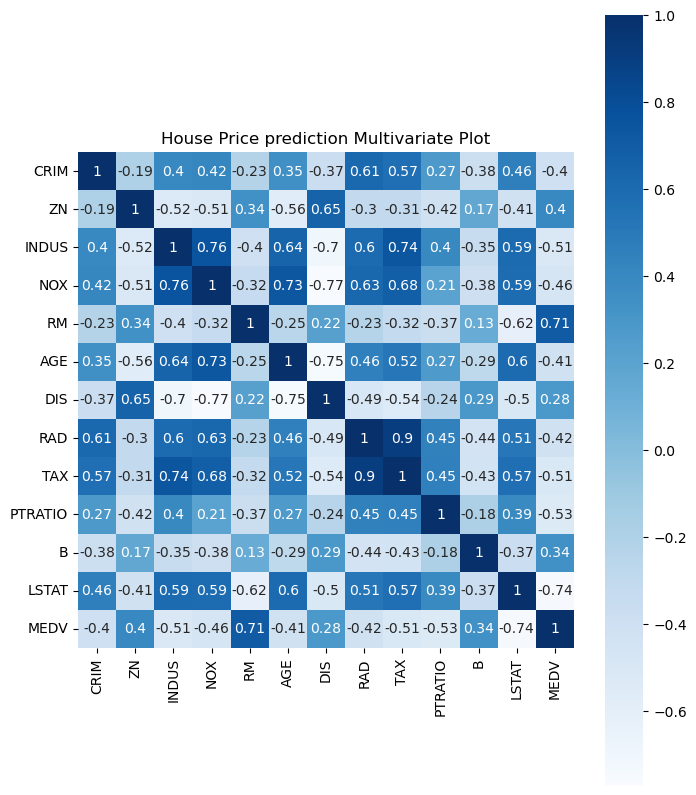

In [27]:
correlaion = df.corr()
fig = plt.subplots(figsize = (8,10))
sns.heatmap(correlaion, vmax=1, square=True, annot=True, cmap ='Blues')
plt.title("House Price prediction Multivariate Plot")

In [28]:
df.corr()['MEDV'].sort_values()

LSTAT     -0.743074
PTRATIO   -0.532117
INDUS     -0.511009
TAX       -0.507151
NOX       -0.462516
RAD       -0.416214
AGE       -0.411035
CRIM      -0.398746
DIS        0.282049
B          0.340414
ZN         0.403151
RM         0.706862
MEDV       1.000000
Name: MEDV, dtype: float64

RM, ZN, B are positively correlated with MEDV.

## Relationship of features with each other

#### Independent and Dependent features

In [29]:
features = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [30]:
X = df[features]
y = df['MEDV']


In [37]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [38]:
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 411, dtype: float64

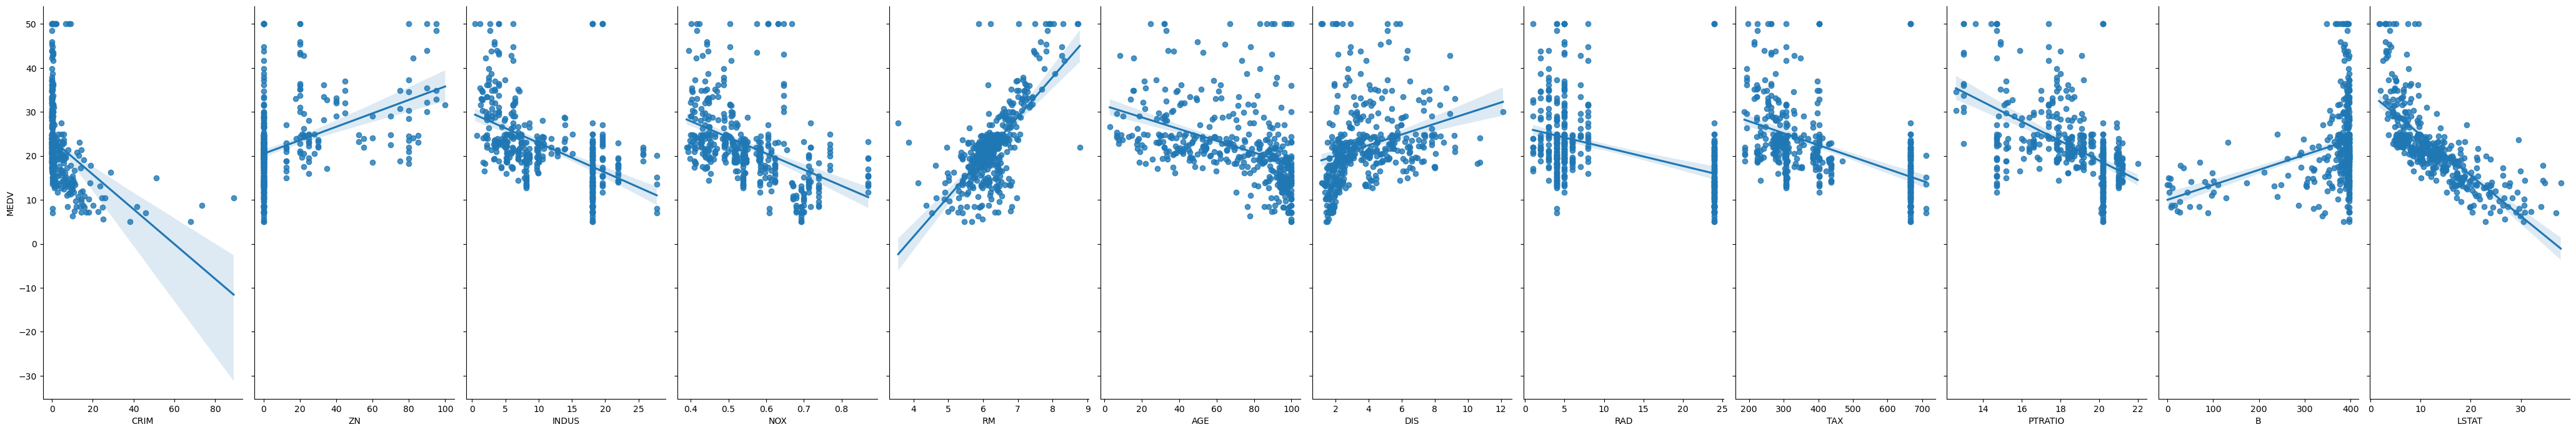

In [31]:
sns.pairplot(df, x_vars=features, y_vars='MEDV', kind = 'reg', height=7, aspect = 0.5)

Text(0, 0.5, 'Price')

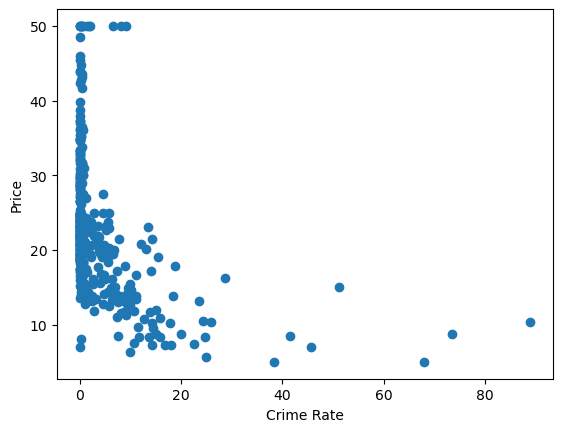

In [32]:
plt.scatter(df['CRIM'],df['MEDV'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Negatively Correlated

Text(0, 0.5, 'Price')

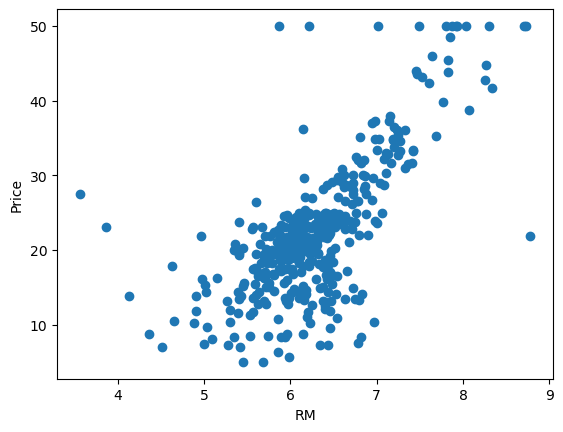

In [33]:
plt.scatter(df['RM'],df['MEDV'])
plt.xlabel("RM")
plt.ylabel("Price")

Positively Correlated

<Axes: xlabel='RM', ylabel='MEDV'>

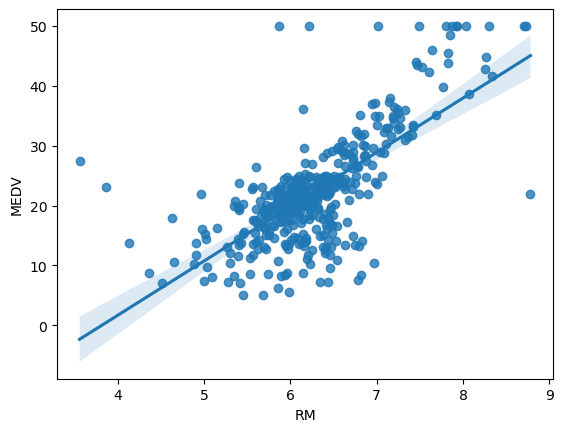

In [34]:
sns.regplot(x="RM",y="MEDV",data=df)

<Axes: xlabel='LSTAT', ylabel='MEDV'>

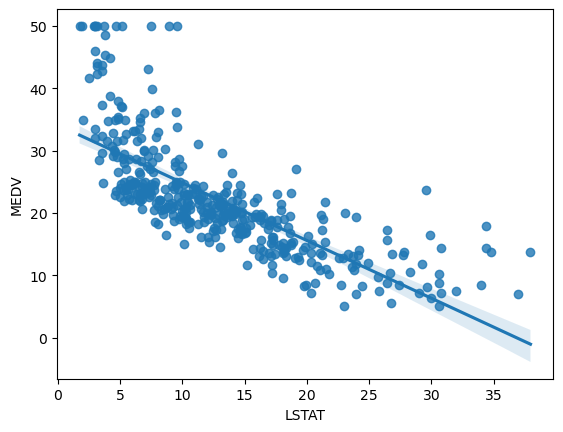

In [35]:
sns.regplot(x="LSTAT",y="MEDV",data=df)

Negatively Correlated

<Axes: xlabel='PTRATIO', ylabel='MEDV'>

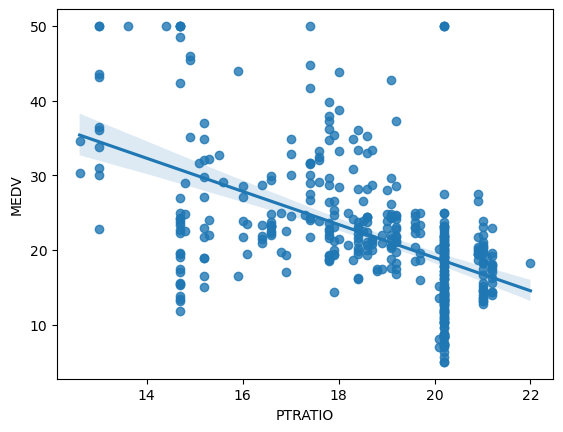

In [36]:
sns.regplot(x="PTRATIO",y="MEDV",data=df)

Negatively Correlated

## Train Test Split

In [39]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(287, 12)
(287,)
(124, 12)
(124,)


80 percent for training, 20 percent for testing

## Standardize the dataset

In [42]:
# All the independent features should be in the same scale
scaler=StandardScaler()

In [43]:
X_train=scaler.fit_transform(X_train)

In [44]:
X_test=scaler.transform(X_test)

In [45]:

pickle.dump(scaler,open('standarization.pkl','wb'))

In [46]:
X_train

array([[ 0.18546249, -0.48936042,  1.02281593, ...,  0.7877203 ,
         0.40448472, -0.75912964],
       [-0.40584513, -0.48936042, -1.01226291, ..., -0.84361386,
         0.42196221,  0.30144233],
       [ 0.75955755, -0.48936042,  1.02281593, ...,  0.7877203 ,
        -2.67489821,  1.48630008],
       ...,
       [-0.41660537, -0.48936042, -0.84713907, ...,  0.7877203 ,
         0.3410479 , -0.79503442],
       [ 0.26084443, -0.48936042,  1.02281593, ...,  0.7877203 ,
        -2.80328225, -0.06589119],
       [-0.40550993, -0.48936042, -0.14898391, ..., -0.29983581,
         0.33392744, -0.28408178]])

In [47]:
X_test

array([[-0.3808225 , -0.48936042, -0.06497354, ...,  0.06268289,
         0.40405318,  1.58434775],
       [-0.25001625, -0.48936042, -0.41984494, ...,  1.150239  ,
        -1.18111213,  1.08168082],
       [-0.41458782, -0.48936042,  0.25948031, ...,  0.10799773,
         0.30868218, -0.02308164],
       ...,
       [ 0.5854259 , -0.48936042,  1.02281593, ...,  0.7877203 ,
        -3.78795548,  0.85658547],
       [-0.41592757,  2.75842543, -1.11075782, ..., -1.07018805,
         0.42196221, -0.31308179],
       [-0.41495157, -0.48936042, -1.10496401, ..., -0.29983581,
         0.41289981, -0.94003449]])

## Model Training

In [49]:
regression=LinearRegression()

In [50]:
regression.fit(X_train,y_train)

LinearRegression()

In [51]:
## print the coefficients
print(regression.coef_)

[-0.84948116  1.23885296 -0.03220924 -2.01320476  2.9477922   0.13549152
 -2.80260817  3.0715605  -2.73437011 -2.11329662  0.99758629 -3.34844774]


In [53]:
 ## the intercept
print(regression.intercept_)

22.54285714285714


In [65]:
### Training Score
train_score = round(regression.score(X_train, y_train)*100,2)
train_score

77.91

Training score is 77.91%

In [54]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### Prediction With Test Data

In [57]:

y_pred=regression.predict(X_test)

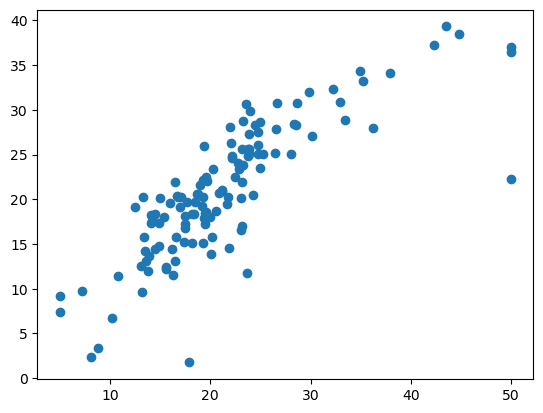

In [58]:
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred)

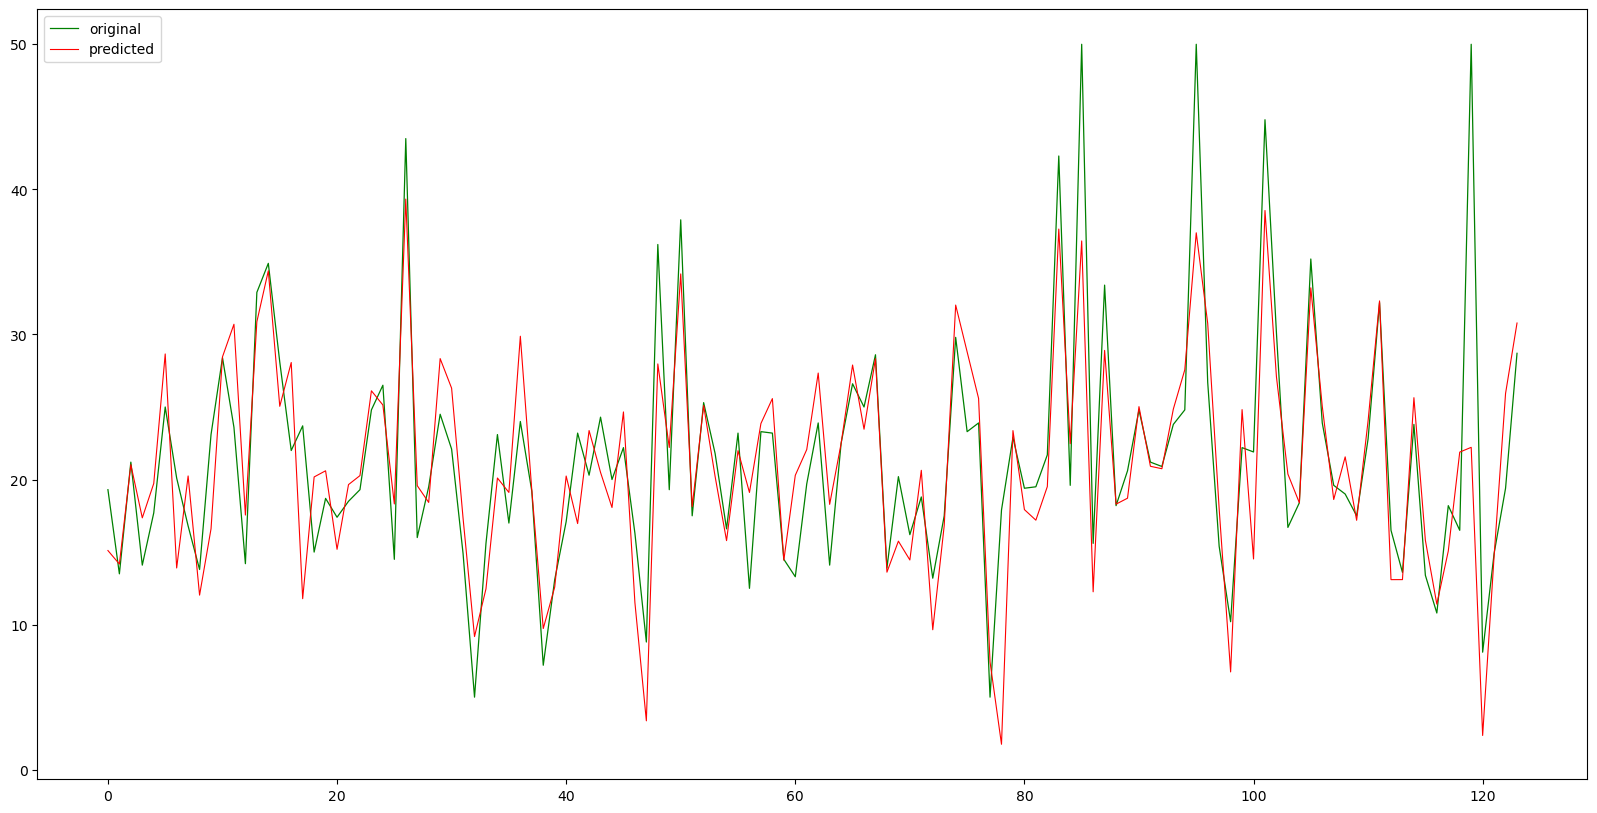

In [66]:
fig,ax = plt.subplots(figsize =(20,10))
x_ax = range(len(X_test))
plt.plot(x_ax,y_test,lw=0.9,color="green",label="original")
plt.plot(x_ax,y_pred,lw=0.8,color="red",label="predicted")
plt.legend()
plt.show()

In [59]:
## Residuals
residuals=y_test-y_pred

residuals

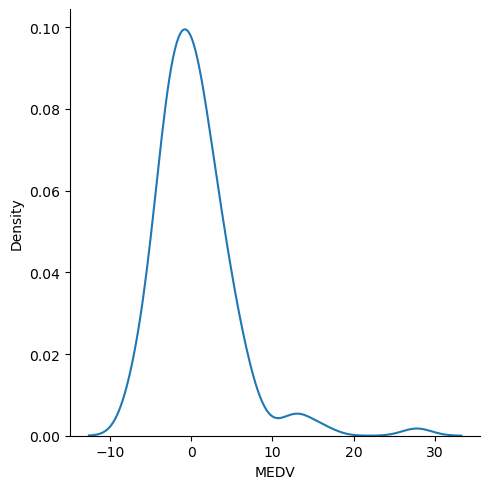

In [60]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

Few Outliers are there

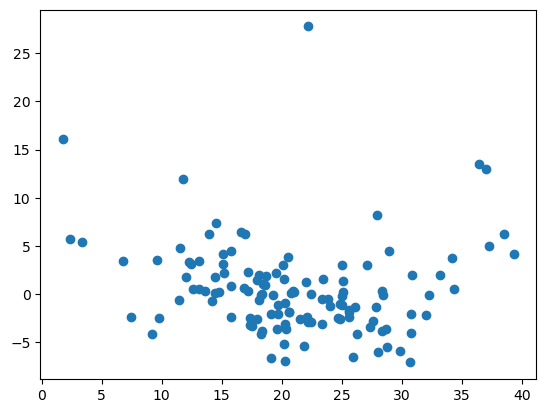

In [61]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

Scattered uniformly

In [67]:
df2 =pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Residuals':y_test-y_pred})
df2.head()

,Actual,Predicted,Residuals
211,19.3,15.105873,4.194127
34,13.5,14.174274,-0.674274
78,21.2,21.026333,0.173667
448,14.1,17.359116,-3.259116
461,17.7,19.727859,-2.027859


### Performance metrics

In [62]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

3.235156095675601
22.918910431750124
4.787369886665341


In [63]:
score=r2_score(y_test,y_pred)
print(score)

0.6690495177773587


Accuracy of the model is 66%

In [64]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6332710872668028

## Predictions on new data

In [69]:
# use the trained model to make predictions on new data
new_data = np.array([[6.320e-03, 1.800e+01, 2.310e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])
# Create a new instance of StandardScaler for the new data
new_data_scaled = scaler.fit_transform(new_data)

# Make predictions
predicted_quality = regression.predict(new_data_scaled)

print("Predicted House Price:", predicted_quality[0])

Predicted House Price: 22.54285714285714


## Saving the model

In [70]:
pickle.dump(regression,open('priceprediction_model.pkl','wb'))